from google.colab import drive
drive.mount('/content/gdrive')

In [1]:
import pandas as pd

In [2]:
# read back in from disk
df = pd.read_csv('talos_hasil2.csv')


In [3]:
df['nodes'] = df.first_neuron + df.second_neuron+df.third_neuron+df.fourth_neuron
df['links'] =  df.nodes * (df.nodes-1) / 2
base_acc= 0.785929737402413

df['val_DetectRate_improvement'] = df.val_acc -base_acc
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_acc').head())

      round_epochs   val_loss   val_acc       loss       acc  hidden_layer  \
1060            50  15.584019  0.033135   7.821515  0.514515             3   
661             50  14.387178  0.107390  13.835996  0.139800             3   
1438            50  14.387173  0.107390  14.617878  0.092901             3   
1437            50  14.387173  0.107390  12.262184  0.238837             3   
1059            50  14.387173  0.107390  14.615995  0.092829             3   

      first_neuron  second_neuron  third_neuron  fourth_neuron  ...  epochs  \
1060            75             50            20              0  ...      30   
661             80             40            15              0  ...      30   
1438            80             40            20              0  ...      30   
1437            75             40            15              0  ...      30   
1059            75             40            30              0  ...      30   

      epochs2  dropout  kernel_initializer              

In [4]:
df.sort_values('val_acc', ascending=False)

,round_epochs,val_loss,val_acc,loss,acc,hidden_layer,first_neuron,second_neuron,third_neuron,fourth_neuron,...,epochs,epochs2,dropout,kernel_initializer,optimizer,lr,activation,nodes,links,val_DetectRate_improvement
1228,50,1.870430,0.833348,0.003613,0.998770,2,100,20,0,0,...,30,50,0,he_uniform,<class 'keras.optimizers.Adam'>,0.0100,ReLU,120,7140.0,0.047418
259,50,1.081224,0.832461,0.005305,0.998325,4,100,50,30,20,...,30,50,0,normal,<class 'keras.optimizers.Adam'>,0.0001,ELU,200,19900.0,0.046531
948,50,1.569258,0.830509,0.012807,0.997452,3,75,60,30,0,...,30,50,0,he_normal,<class 'keras.optimizers.Adam'>,0.0100,PReLU,165,13530.0,0.044579
1229,50,1.593558,0.830465,0.004122,0.998635,2,60,20,0,0,...,30,50,0,glorot_uniform,<class 'keras.optimizers.Adam'>,0.0100,ReLU,80,3160.0,0.044535
662,50,1.439708,0.829800,0.004171,0.998619,4,80,60,30,20,...,30,50,0,normal,<class 'keras.optimizers.Adam'>,0.0100,LeakyReLU,190,17955.0,0.043870
1230,50,1.687323,0.828557,0.016269,0.995174,2,60,40,0,0,...,30,50,0,glorot_normal,<class 'keras.optimizers.Adam'>,0.1000,ReLU,100,4950.0,0.042628
41,50,1.926766,0.827803,0.005597,0.998293,2,100,50,0,0,...,30,50,0,normal,<class 'keras.optimizers.Adam'>,0.0100,ELU,150,11175.0,0.041874
1231,50,1.667357,0.827271,0.006699,0.998301,2,80,50,0,0,...,30,50,0,glorot_normal,<class 'keras.optimizers.Adam'>,0.0100,ReLU,130,8385.0,0.041341
1599,50,1.781096,0.825896,0.006250,0.998238,2,100,30,0,0,...,30,50,0,he_uniform,<class 'keras.optimizers.Adam'>,0.0100,SELU,130,8385.0,0.039966
663,50,1.713322,0.825497,0.004519,0.998619,4,80,60,30,20,...,30,50,0,glorot_normal,<class 'keras.optimizers.Adam'>,0.0100,LeakyReLU,190,17955.0,0.039567


In [5]:
import seaborn as sns
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_DetectRate_improvement", data=df.reset_index(),color='salmon')
ax.set_title('Log-DetectionRate Improvement as a function of Neurons in the First Layer')
# Increasing neurons have a strong, positive impact

Text(0.5,1,'Log-DetectionRate Improvement as a function of Neurons in the First Layer')

In [6]:
df['val_DetectRate']=df['val_acc']

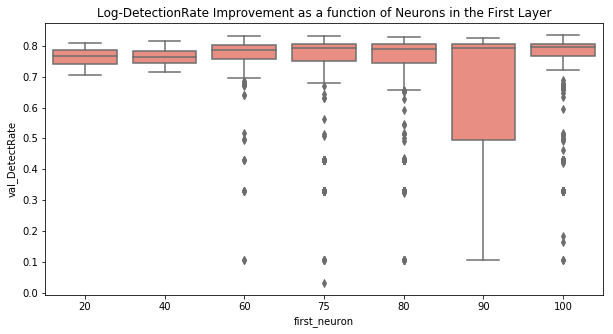

In [7]:
import matplotlib.pyplot as plt
metric = 'first_neuron'
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title('Log-DetectionRate Improvement as a function of Neurons in the First Layer')
# Increasing neurons have a strong, positive impact
plt.savefig('./image/LOgDetectRate-FirstLayer.eps',dpi=1000)

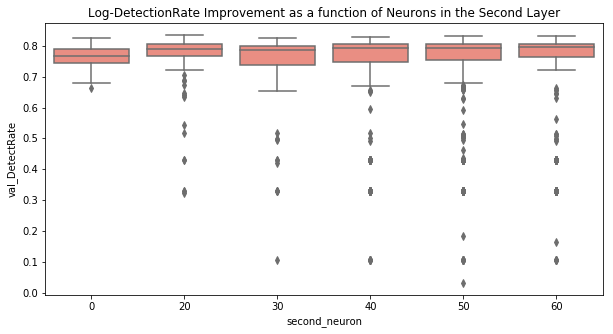

In [18]:
plt.figure(figsize=(10, 5))
metric = 'second_neuron'
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title('Log-DetectionRate Improvement as a function of Neurons in the Second Layer')
# Increasing neurons have a strong, positive impact
plt.savefig('./image/LOgDetectRate-SecondLayer.eps',dpi=1000)

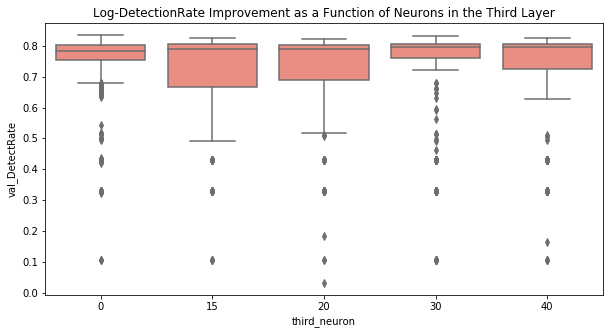

In [19]:
plt.figure(figsize=(10, 5))
metric = 'third_neuron'
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title('Log-DetectionRate Improvement as a Function of Neurons in the Third Layer')
# Increasing neurons have a strong, positive impact
plt.savefig('./image/LOgDetectRate-ThirdLayer.eps',dpi=1000)

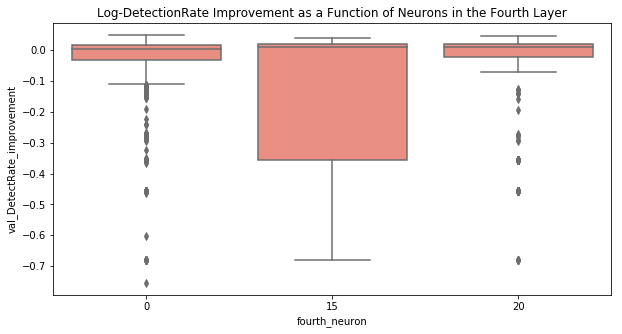

In [10]:
plt.figure(figsize=(10, 5))
metric = 'fourth_neuron'
ax = sns.boxplot(x=metric, y="val_DetectRate_improvement", data=df.reset_index(),color='salmon')
ax.set_title('Log-DetectionRate Improvement as a Function of Neurons in the Fourth Layer')
# Increasing neurons have a strong, positive impact
#plt.savefig('./image/LOgDetectRate-FourthLayer.eps',dpi=1000)

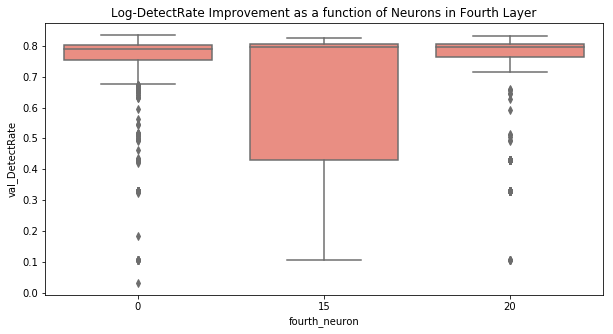

In [17]:
plt.figure(figsize=(10, 5))
metric = 'fourth_neuron'
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title('Log-DetectRate Improvement as a function of Neurons in Fourth Layer')
# Increasing neurons have a strong, positive impact
plt.savefig('./image/LOgDetectRate-FourthLayer.eps',dpi=1000)

Text(0.5,1,'Log-val DetectRate Improvement as a function of hidden_layer')

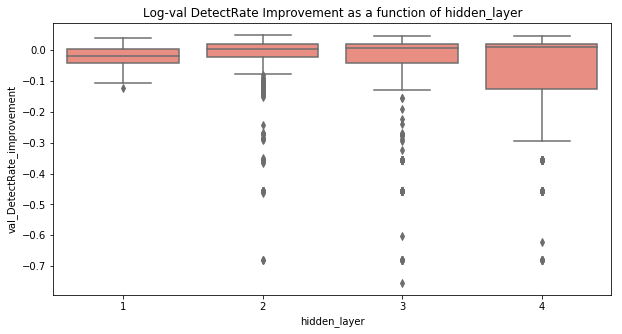

In [20]:
plt.figure(figsize=(10, 5))
metric = 'hidden_layer'
ax = sns.boxplot(x=metric, y="val_DetectRate_improvement", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-val DetectRate Improvement as a function of {metric}')
# Surprisingly, no hidden layers is consistently best
#plt.savefig('./image/LOgDetectRate-hiddenLayer.eps',dpi=1000)

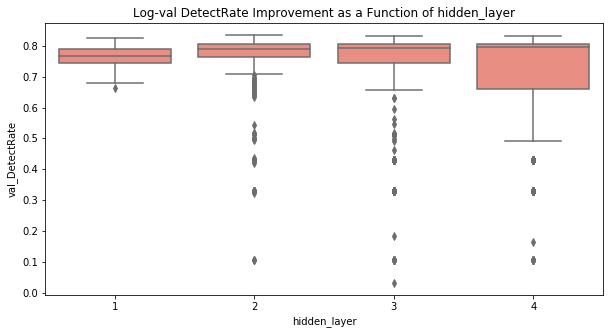

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
metric = 'hidden_layer'
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-val DetectRate Improvement as a Function of {metric}')
# Surprisingly, no hidden layers is consistently best
plt.show()
plt.savefig('./image/LOgDetectRate-hiddenLayer.eps',dpi=1000)


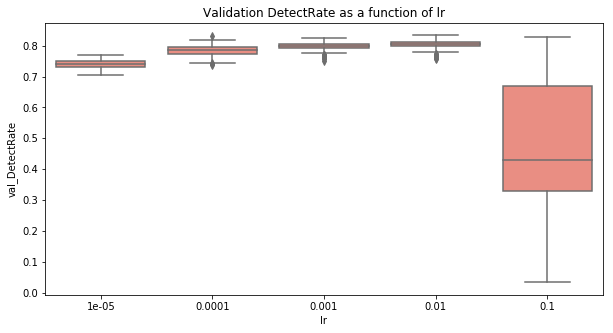

In [22]:
plt.figure(figsize=(10, 5))
metric = 'lr'
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation DetectRate as a function of {metric}')
# Generally, larger batch sizes don't hurt (and train faster)
plt.savefig('./image/DetectRateImprovement-lr.eps',dpi=1000)

In [23]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Text(0.5,1,'Validation DetectRate as function of lr')

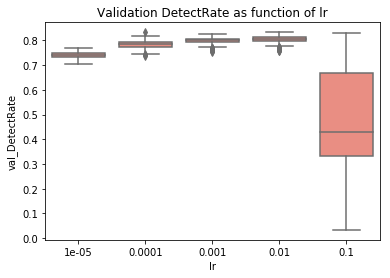

In [18]:
metric = 'lr'
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation DetectRate as function of {metric}')
# Generally, larger batch sizes don't hurt (and train faster)

Text(0.5,1,'Validation DetectRate as a Function of batch_size')

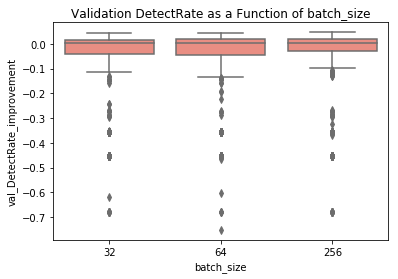

In [24]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_DetectRate_improvement", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation DetectRate as a Function of {metric}')
# Generally, larger batch sizes don't hurt (and train faster)


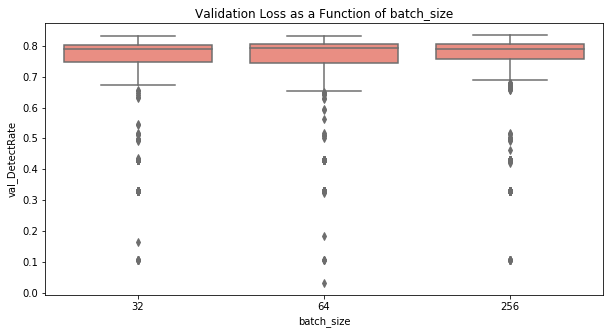

In [27]:
plt.figure(figsize=(10, 5))
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_DetectRate", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as a Function of {metric}')
# Generally, larger batch sizes don't hurt (and train faster)
plt.savefig('./image/DetectRateImprovement-batchsize.eps',dpi=1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


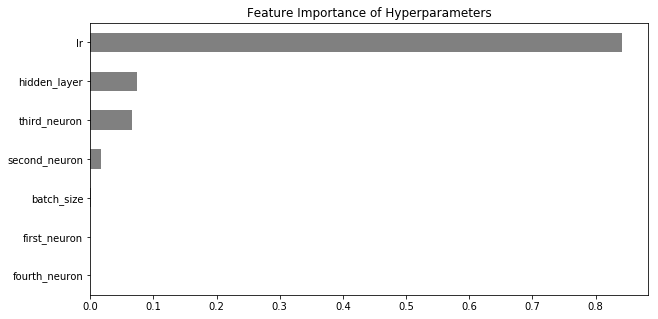

In [28]:
from sklearn.preprocessing import MinMaxScaler
X = df[['first_neuron','second_neuron','third_neuron','fourth_neuron','hidden_layer','lr','batch_size']]
scaler = MinMaxScaler()
y = scaler.fit_transform(df[['val_DetectRate_improvement']])

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=3,n_estimators=100)

plt.figure(figsize=(10, 5))
reg.fit(X,y)
pd.Series(reg.feature_importances_,index=X.columns).\
sort_values(ascending=True).plot.barh(color='grey',title='Feature Importance of Hyperparameters')
plt.savefig('./image/Importance ofHyperparaeters.eps',dpi=1000)

In [29]:
print("Features sorted by their score:")
#print (sorted([(round(np.mean(reg.feature_importances), 4), feat) for
#              X.columns, reg.feature_importances in reg.feature_importances.items()], reverse=True))
print(pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False))

Features sorted by their score:
lr               0.841097
hidden_layer     0.074082
third_neuron     0.066468
second_neuron    0.016552
batch_size       0.001271
first_neuron     0.000459
fourth_neuron    0.000070
dtype: float64


Text(0.5,1,'Epochs Until Convergence vs. Link Count')

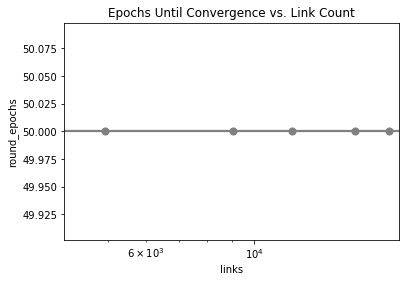

In [30]:
ax = sns.regplot(x='links', y="round_epochs",x_bins=5,logx=True ,data=df[['links','round_epochs']],color='grey')
ax.set_xscale('log')

ax.set_title(f'Epochs Until Convergence vs. Link Count')

Text(0.5,1,'Log-DetectRate Improvement for Varying Shapes')

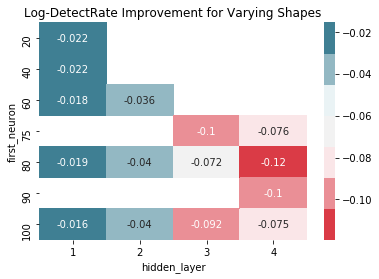

In [31]:
df_grid = df.reset_index().groupby(["first_neuron", "hidden_layer"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement for Varying Shapes')
# Unsurprisingly, bigger on both layer types is better.  

Text(0.5,1,'Log-DetectRate Improvement for Varying Shapes')

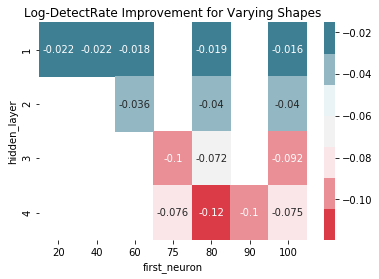

In [32]:
df_grid = df.reset_index().groupby(["hidden_layer", "first_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement for Varying Shapes')

Text(0.5,1,'Log-DetectRate Improvement for Varying Shapes')

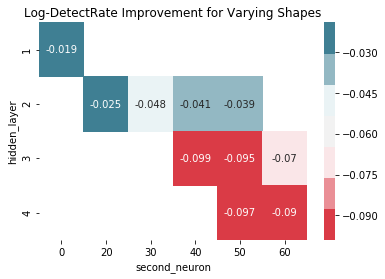

In [33]:
df_grid = df.reset_index().groupby(["hidden_layer", "second_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement for Varying Shapes')

Text(0.5,1,'Log-DetectRate Improvement for Varying Shapes')

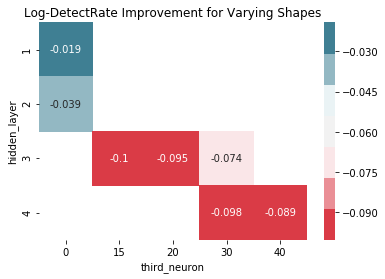

In [34]:
df_grid = df.reset_index().groupby(["hidden_layer", "third_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement for Varying Shapes')

Text(0.5,1,'Log-DetectRate Improvement for Varying Shapes')

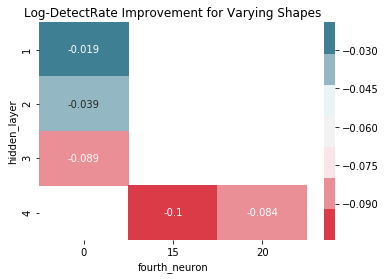

In [35]:
df_grid = df.reset_index().groupby(["hidden_layer", "fourth_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement for Varying Shapes')

Text(0.5,1,'Log-DetectRate Improvement vs lr/Size')

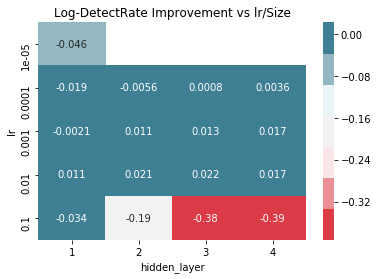

In [36]:
df_grid = df.reset_index().groupby(["lr", "hidden_layer"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement vs lr/Size')
# Surprisingly, dropout didn't help even at larger geometries

Text(0.5,1,'Log-DetectRate Improvement vs lr/Size')

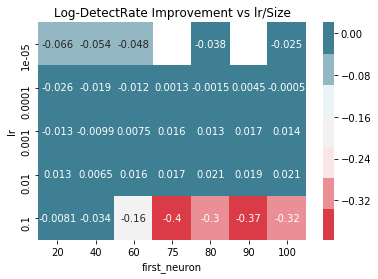

In [37]:
df_grid = df.reset_index().groupby(["lr", "first_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement vs lr/Size')
# Surprisingly, dropout didn't help even at larger geometries

Text(0.5,1,'Log-DetectRate Improvement vs lr/Size')

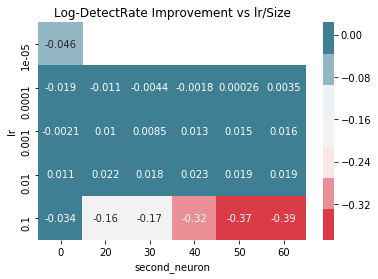

In [38]:
df_grid = df.reset_index().groupby(["lr", "second_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement vs lr/Size')
# Surprisingly, dropout didn't help even at larger geometries

Text(0.5,1,'Log-DetectRate Improvement vs lr/Size')

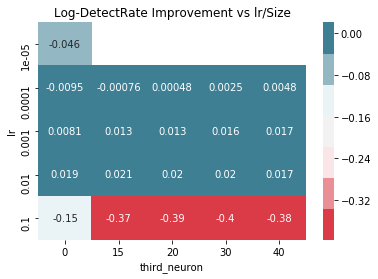

In [39]:
df_grid = df.reset_index().groupby(["lr", "third_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement vs lr/Size')
# Surprisingly, dropout didn't help even at larger geometries

Text(0.5,1,'Log-DetectRate Improvement vs lr/Size')

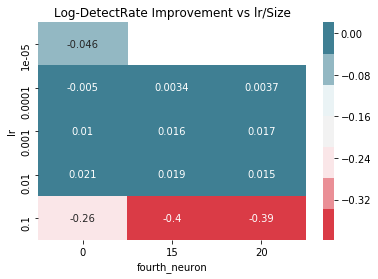

In [40]:
df_grid = df.reset_index().groupby(["lr", "fourth_neuron"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement vs lr/Size')
# Surprisingly, dropout didn't help even at larger geometries

Text(0.5,1,'Log-DetectRate Improvement vs lr/Size')

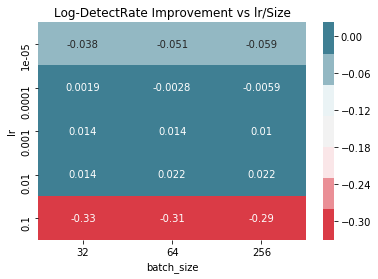

In [41]:
df_grid = df.reset_index().groupby(["lr", "batch_size"]).val_DetectRate_improvement.mean().unstack()
ax = sns.heatmap(data=df_grid,cmap = (sns.diverging_palette(10, 220, sep=80, n=7)),annot=True)
ax.set_title('Log-DetectRate Improvement vs lr/Size')
# Surprisingly, dropout didn't help even at larger geometries

Text(0.5,1,'Log-DetectRate Improvement as an effect of Kernel Initialization')

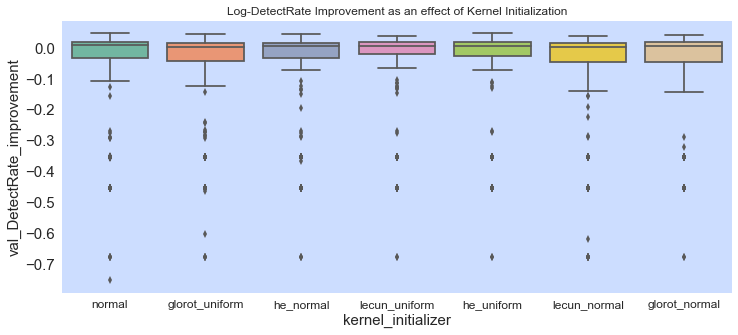

In [45]:
sns.set(rc={"axes.facecolor":"#ccddff",
            "axes.grid":False,
            'axes.labelsize':15,
            'figure.figsize':(12.0, 5.0),
            'xtick.labelsize':12,
            'ytick.labelsize':15})

metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_DetectRate_improvement",data=df.reset_index(), palette="Set2")
ax.set_title('Log-DetectRate Improvement as an effect of Kernel Initialization')
# Increasing neurons have a strong, positive impact

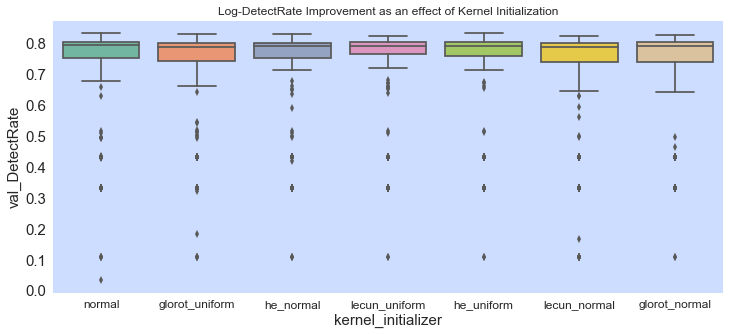

In [46]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_DetectRate",data=df.reset_index(), palette="Set2")
ax.set_title('Log-DetectRate Improvement as an effect of Kernel Initialization')
# Increasing neurons have a strong, positive impact
plt.savefig('./image/Log DetectRate vs KernelInitial.eps',dpi=1000)

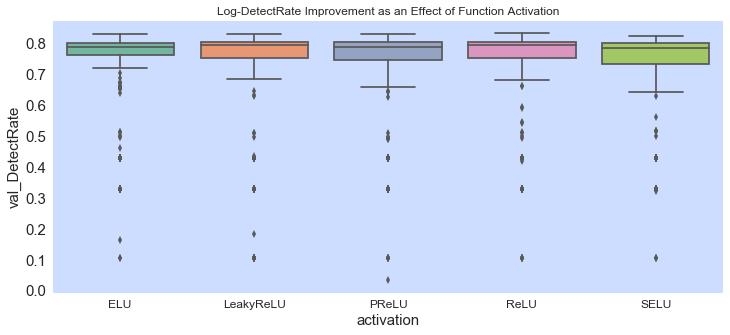

In [47]:
metric = 'activation'
ax = sns.boxplot(x=metric, y="val_DetectRate",data=df.reset_index(), palette="Set2")
ax.set_title('Log-DetectRate Improvement as an Effect of Function Activation')
# Increasing neurons have a strong, positive impact
plt.savefig('./image/Log DetectRate vs Functionactv.eps',dpi=1000)

Text(0.5,1,'Log-DetectRate Improvement as function Activation')

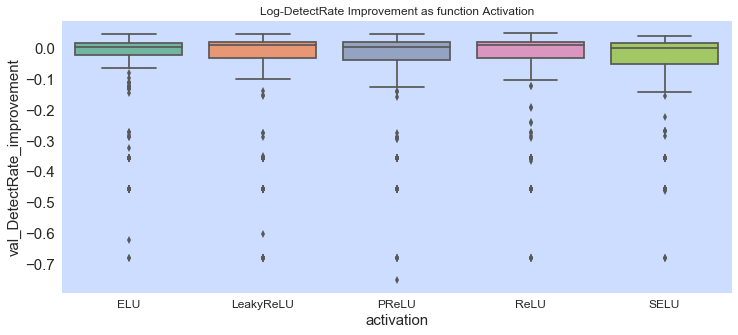

In [39]:
metric = 'activation'
ax = sns.boxplot(x=metric, y="val_DetectRate_improvement",data=df.reset_index(), palette="Set2")
ax.set_title('Log-DetectRate Improvement as function Activation')
# Increasing neurons have a strong, positive impact